# Initialize

In [4]:
%matplotlib inline
import yt
import yt.fields.vector_operations
from yt.units import dimensions, kboltz, mp
import os, sys, glob, errno
import matplotlib as mpl
#mpl.use("agg")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import Locator
from scipy.interpolate import spline
import operator
import h5py
sys.path.append("../")

# Import functions from magnolia
from magnolia import *

a = 0

class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically
        """
        self.linthresh = linthresh

    def __call__(self):
        'Return the locations of the ticks'
        majorlocs = self.axis.get_majorticklocs()

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                                  '%s type.' % type(self))


SIM_TYPE11 = "1to1_b0"
SIM_TYPE12 = "1to1_b0.5"
SIM_TYPE13 = "1to1_b1"
SIM_TYPE21 = "1to3_b0"
SIM_TYPE22 = "1to3_b0.5"
SIM_TYPE23 = "1to3_b1"
SIM_TYPE31 = "1to10_b0"
SIM_TYPE32 = "1to10_b0.5"
SIM_TYPE33 = "1to10_b1"

SIM_TYPE11_mag = "../processed-data/1to1_b0"+"_mag.hdf5"
SIM_TYPE12_mag = "../processed-data/1to1_b0.5"+"_mag.hdf5"
SIM_TYPE13_mag = "../processed-data/1to1_b1"+"_mag.hdf5"

SIM_TYPE21_mag = "../processed-data/1to3_b0"+"_mag.hdf5"
SIM_TYPE22_mag = "../processed-data/1to3_b0.5"+"_mag.hdf5"
SIM_TYPE23_mag = "../processed-data/1to3_b1"+"_mag.hdf5"

SIM_TYPE31_mag = "../processed-data/1to10_b0"+"_mag.hdf5"
SIM_TYPE32_mag = "../processed-data/1to10_b0.5"+"_mag.hdf5"
SIM_TYPE33_mag = "../processed-data/1to10_b1"+"_mag.hdf5"

SIM_TYPE11_no_mag = "../processed-data/1to1_b0"+"_no_mag.hdf5"
SIM_TYPE12_no_mag = "../processed-data/1to1_b0.5"+"_no_mag.hdf5"
SIM_TYPE13_no_mag = "../processed-data/1to1_b1"+"_no_mag.hdf5"

SIM_TYPE21_no_mag = "../processed-data/1to3_b0"+"_no_mag.hdf5"
SIM_TYPE22_no_mag = "../processed-data/1to3_b0.5"+"_no_mag.hdf5"
SIM_TYPE23_no_mag = "../processed-data/1to3_b1"+"_no_mag.hdf5"

SIM_TYPE31_no_mag = "../processed-data/1to10_b0"+"_no_mag.hdf5"
SIM_TYPE32_no_mag = "../processed-data/1to10_b0.5"+"_no_mag.hdf5"
SIM_TYPE33_no_mag = "../processed-data/1to10_b1"+"_no_mag.hdf5"

# Components at t = 0 gpot

/data/mimir/jzuhone/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

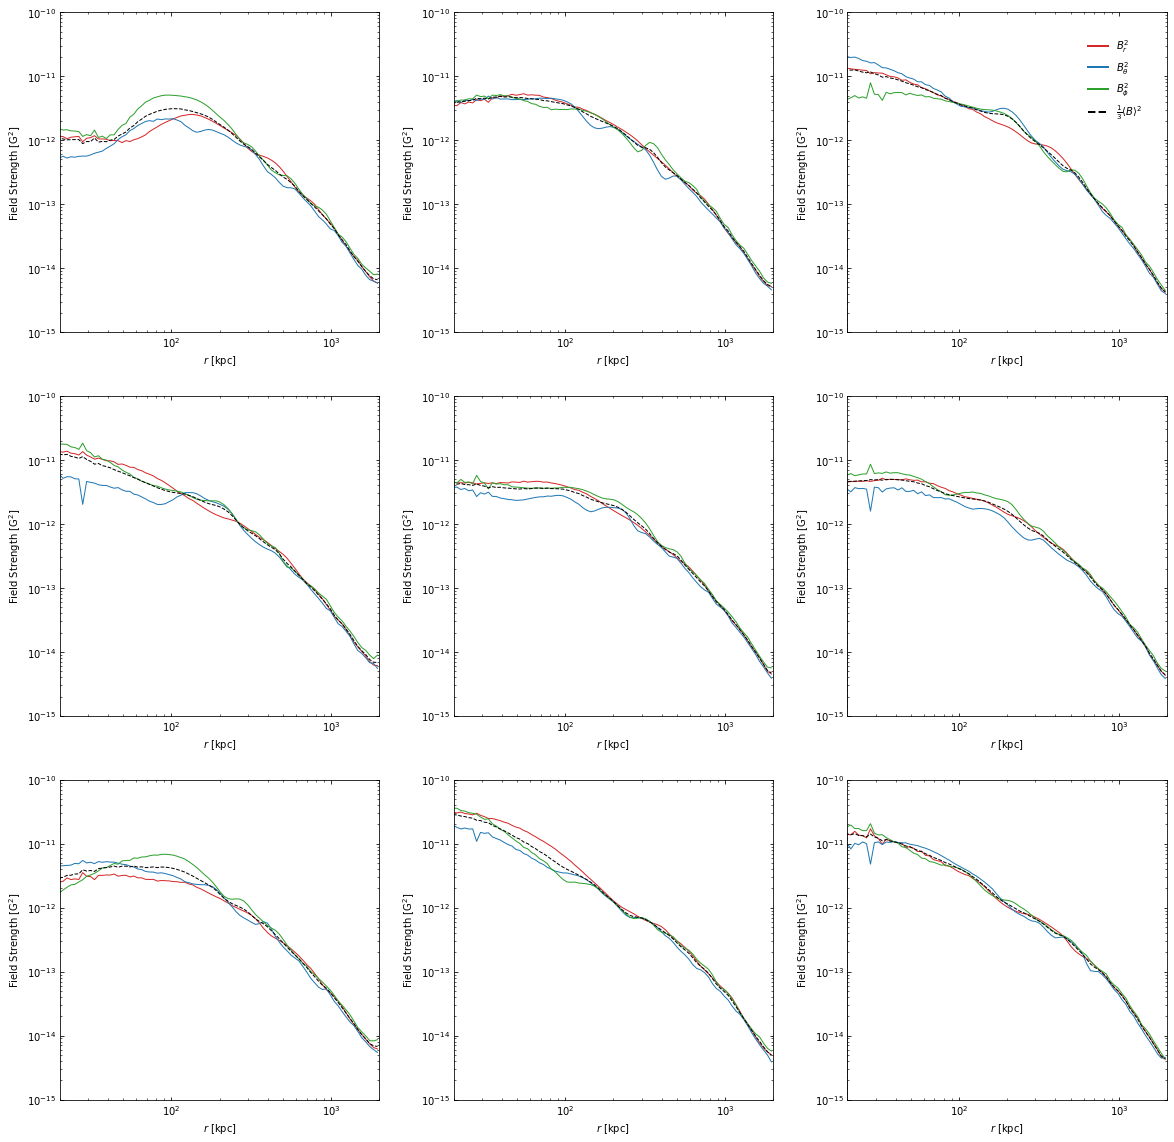

In [5]:
radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_gpot_afterfix")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(20, 20))

xlim1=2e1
xlim2=2e3
ylim1=1e-15
ylim2=1e-10
num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

ax11 = plt.subplot(331, aspect=num)
ax21 = plt.subplot(332, aspect=num)
ax31 = plt.subplot(333, aspect=num)
ax12 = plt.subplot(334, aspect=num)
ax22 = plt.subplot(335, aspect=num)
ax32 = plt.subplot(336, aspect=num)
ax13 = plt.subplot(337, aspect=num)
ax23 = plt.subplot(338, aspect=num)
ax33 = plt.subplot(339, aspect=num)
# ax11 = plt.subplot(331)
# ax21 = plt.subplot(332)
# ax31 = plt.subplot(333)
# ax12 = plt.subplot(334)
# ax22 = plt.subplot(335)
# ax32 = plt.subplot(336)
# ax13 = plt.subplot(337)
# ax23 = plt.subplot(338)
# ax33 = plt.subplot(339)

axes = [ax11, ax21, ax31, ax12, ax22, ax32, ax13, ax23, ax33]

line_11_r,   = ax11.plot(radius, mag_field_squared_mean_radius(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label=r"$B_{r}^2$")
line_11_t,   = ax11.plot(radius, mag_field_squared_mean_theta(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label=r"$B_{\theta}^2$")
line_11_p,   = ax11.plot(radius, mag_field_squared_mean_phi(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label=r"$B_{\phi}^2$")
line_11_tot, = ax11.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE11_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\frac{1}{3}{\langle B \rangle}^2$")

line_12_r,   = ax12.plot(radius, mag_field_squared_mean_radius(SIM_TYPE12_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_12_t,   = ax12.plot(radius, mag_field_squared_mean_theta(SIM_TYPE12_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_12_p,   = ax12.plot(radius, mag_field_squared_mean_phi(SIM_TYPE12_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_12_tot, = ax12.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE12_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_13_r,   = ax13.plot(radius, mag_field_squared_mean_radius(SIM_TYPE13_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_13_t,   = ax13.plot(radius, mag_field_squared_mean_theta(SIM_TYPE13_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_13_p,   = ax13.plot(radius, mag_field_squared_mean_phi(SIM_TYPE13_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_13_tot, = ax13.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE13_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_21_r,   = ax21.plot(radius, mag_field_squared_mean_radius(SIM_TYPE21_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_21_t,   = ax21.plot(radius, mag_field_squared_mean_theta(SIM_TYPE21_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_21_p,   = ax21.plot(radius, mag_field_squared_mean_phi(SIM_TYPE21_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_21_tot, = ax21.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE21_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_22_r,   = ax22.plot(radius, mag_field_squared_mean_radius(SIM_TYPE22_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_22_t,   = ax22.plot(radius, mag_field_squared_mean_theta(SIM_TYPE22_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_22_p,   = ax22.plot(radius, mag_field_squared_mean_phi(SIM_TYPE22_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_22_tot, = ax22.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE22_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_23_r,   = ax23.plot(radius, mag_field_squared_mean_radius(SIM_TYPE23_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_23_t,   = ax23.plot(radius, mag_field_squared_mean_theta(SIM_TYPE23_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_23_p,   = ax23.plot(radius, mag_field_squared_mean_phi(SIM_TYPE23_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_23_tot, = ax23.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE23_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_31_r,   = ax31.plot(radius, mag_field_squared_mean_radius(SIM_TYPE31_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_31_t,   = ax31.plot(radius, mag_field_squared_mean_theta(SIM_TYPE31_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_31_p,   = ax31.plot(radius, mag_field_squared_mean_phi(SIM_TYPE31_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_31_tot, = ax31.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE31_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_32_r,   = ax32.plot(radius, mag_field_squared_mean_radius(SIM_TYPE32_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_32_t,   = ax32.plot(radius, mag_field_squared_mean_theta(SIM_TYPE32_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_32_p,   = ax32.plot(radius, mag_field_squared_mean_phi(SIM_TYPE32_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_32_tot, = ax32.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE32_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_33_r,   = ax33.plot(radius, mag_field_squared_mean_radius(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_33_t,   = ax33.plot(radius, mag_field_squared_mean_theta(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_33_p,   = ax33.plot(radius, mag_field_squared_mean_phi(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_33_tot, = ax33.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE33_mag,"profiles_0000_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")


# Format legends
leg1 = ax31.legend(handles=[line_11_r,line_11_t,line_11_p,line_11_tot], bbox_to_anchor=(0.95, 0.95))

leg1.get_frame().set_linewidth(0.0)

for legobj in leg1.legendHandles:
    legobj.set_linewidth(2.0)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel("Field Strength [G$^2$]")

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('log')
    plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(ylim1,ylim2)
#     plot_ax.set_xscale('log')
#     plot_ax.set_yscale('symlog', linthreshy=1e-15)
#     plot_ax.set_xlim(xlim1,xlim2)
#     plot_ax.set_ylim(0,1e-11)

#     yaxis = plt.gca().yaxis
#     yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
#plt.tight_layout()
plt.savefig('mag_field_components_initial_gpot.pdf',bbox_inches='tight')
plt.show()

# Components at final state gpot

/data/mimir/jzuhone/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

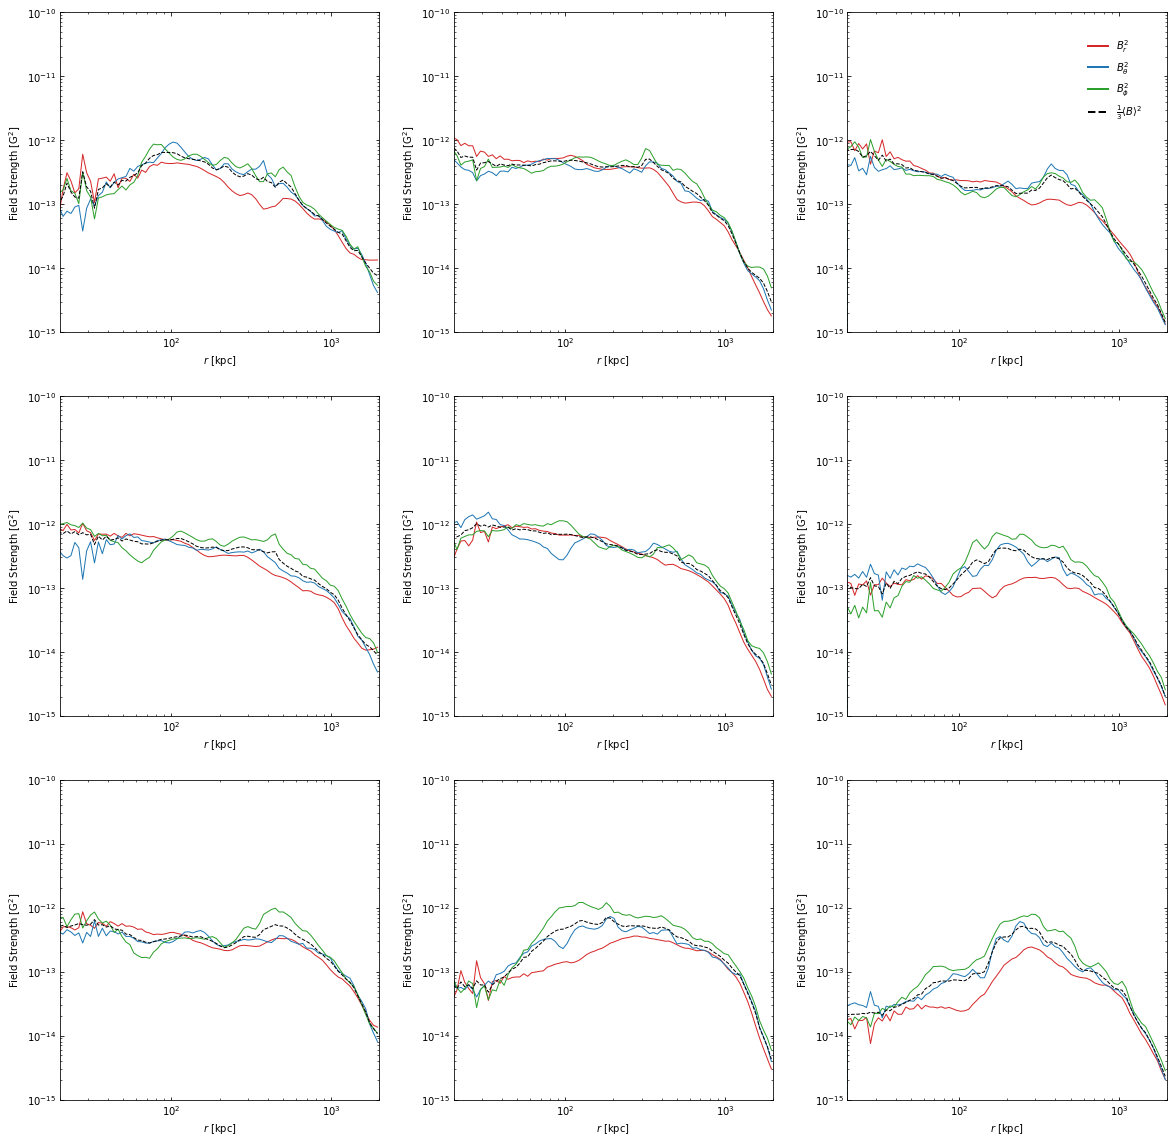

In [6]:
radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_gpot_afterfix")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(20, 20))

xlim1=2e1
xlim2=2e3
ylim1=1e-15
ylim2=1e-10
num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

ax11 = plt.subplot(331, aspect=num)
ax21 = plt.subplot(332, aspect=num)
ax31 = plt.subplot(333, aspect=num)
ax12 = plt.subplot(334, aspect=num)
ax22 = plt.subplot(335, aspect=num)
ax32 = plt.subplot(336, aspect=num)
ax13 = plt.subplot(337, aspect=num)
ax23 = plt.subplot(338, aspect=num)
ax33 = plt.subplot(339, aspect=num)
# ax11 = plt.subplot(331)
# ax21 = plt.subplot(332)
# ax31 = plt.subplot(333)
# ax12 = plt.subplot(334)
# ax22 = plt.subplot(335)
# ax32 = plt.subplot(336)
# ax13 = plt.subplot(337)
# ax23 = plt.subplot(338)
# ax33 = plt.subplot(339)

axes = [ax11, ax21, ax31, ax12, ax22, ax32, ax13, ax23, ax33]

line_11_r,   = ax11.plot(radius, mag_field_squared_mean_radius(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label=r"$B_{r}^2$")
line_11_t,   = ax11.plot(radius, mag_field_squared_mean_theta(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label=r"$B_{\theta}^2$")
line_11_p,   = ax11.plot(radius, mag_field_squared_mean_phi(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label=r"$B_{\phi}^2$")
line_11_tot, = ax11.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE11_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label=r"$\frac{1}{3}{\langle B \rangle}^2$")

line_12_r,   = ax12.plot(radius, mag_field_squared_mean_radius(SIM_TYPE12_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_12_t,   = ax12.plot(radius, mag_field_squared_mean_theta(SIM_TYPE12_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_12_p,   = ax12.plot(radius, mag_field_squared_mean_phi(SIM_TYPE12_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_12_tot, = ax12.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE12_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_13_r,   = ax13.plot(radius, mag_field_squared_mean_radius(SIM_TYPE13_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_13_t,   = ax13.plot(radius, mag_field_squared_mean_theta(SIM_TYPE13_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_13_p,   = ax13.plot(radius, mag_field_squared_mean_phi(SIM_TYPE13_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_13_tot, = ax13.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE13_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_21_r,   = ax21.plot(radius, mag_field_squared_mean_radius(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_21_t,   = ax21.plot(radius, mag_field_squared_mean_theta(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_21_p,   = ax21.plot(radius, mag_field_squared_mean_phi(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_21_tot, = ax21.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE21_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_22_r,   = ax22.plot(radius, mag_field_squared_mean_radius(SIM_TYPE22_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_22_t,   = ax22.plot(radius, mag_field_squared_mean_theta(SIM_TYPE22_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_22_p,   = ax22.plot(radius, mag_field_squared_mean_phi(SIM_TYPE22_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_22_tot, = ax22.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE22_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_23_r,   = ax23.plot(radius, mag_field_squared_mean_radius(SIM_TYPE23_mag,"profiles_0450_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_23_t,   = ax23.plot(radius, mag_field_squared_mean_theta(SIM_TYPE23_mag,"profiles_0450_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_23_p,   = ax23.plot(radius, mag_field_squared_mean_phi(SIM_TYPE23_mag,"profiles_0450_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_23_tot, = ax23.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE23_mag,"profiles_0450_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_31_r,   = ax31.plot(radius, mag_field_squared_mean_radius(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_31_t,   = ax31.plot(radius, mag_field_squared_mean_theta(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_31_p,   = ax31.plot(radius, mag_field_squared_mean_phi(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_31_tot, = ax31.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE31_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_32_r,   = ax32.plot(radius, mag_field_squared_mean_radius(SIM_TYPE32_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_32_t,   = ax32.plot(radius, mag_field_squared_mean_theta(SIM_TYPE32_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_32_p,   = ax32.plot(radius, mag_field_squared_mean_phi(SIM_TYPE32_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_32_tot, = ax32.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE32_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_33_r,   = ax33.plot(radius, mag_field_squared_mean_radius(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix"), 'C3', lw=1, label="$B_r^2$")
line_33_t,   = ax33.plot(radius, mag_field_squared_mean_theta(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix"), 'C0', lw=1, label="$B_\theta^2$")
line_33_p,   = ax33.plot(radius, mag_field_squared_mean_phi(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix"), 'C2', lw=1, label="$B_\phi^2$")
line_33_tot, = ax33.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE33_mag,"profiles_0500_gpot_afterfix"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")


# Format legends
leg1 = ax31.legend(handles=[line_11_r,line_11_t,line_11_p,line_11_tot], bbox_to_anchor=(0.95, 0.95))

leg1.get_frame().set_linewidth(0.0)

for legobj in leg1.legendHandles:
    legobj.set_linewidth(2.0)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel("Field Strength [G$^2$]")

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('log')
    plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(ylim1,ylim2)
#     plot_ax.set_xscale('log')
#     plot_ax.set_yscale('symlog', linthreshy=1e-15)
#     plot_ax.set_xlim(xlim1,xlim2)
#     plot_ax.set_ylim(0,1e-11)

#     yaxis = plt.gca().yaxis
#     yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10500.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
#plt.tight_layout()
plt.savefig('mag_field_components_final_gpot.pdf',bbox_inches='tight')
plt.show()

# Components at t = 0 most bound

/data/mimir/jzuhone/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

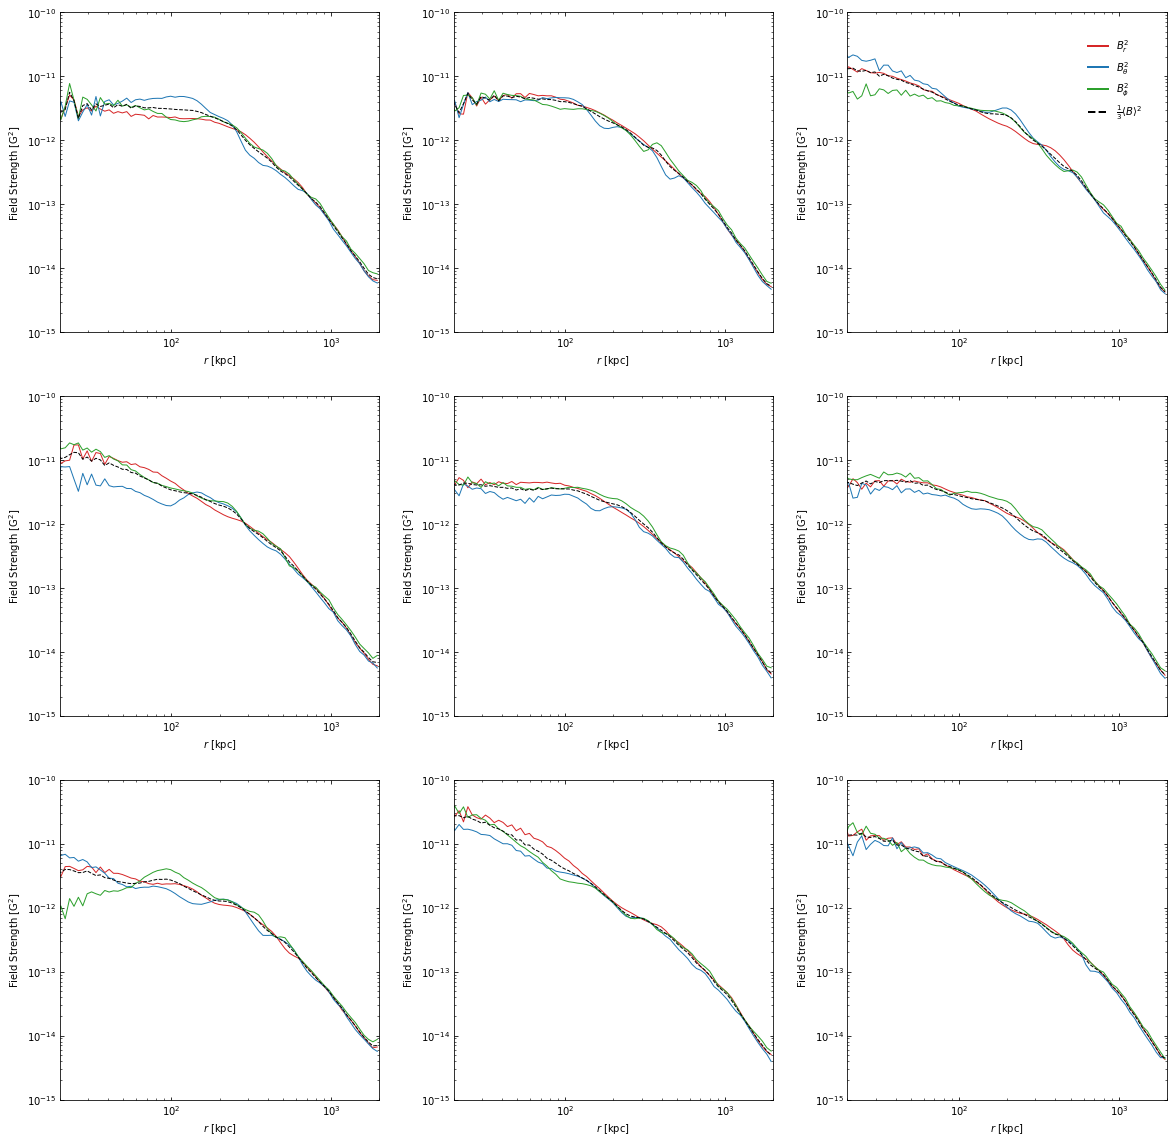

In [7]:
radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_most_bound")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(20, 20))

xlim1=2e1
xlim2=2e3
ylim1=1e-15
ylim2=1e-10
num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

ax11 = plt.subplot(331, aspect=num)
ax21 = plt.subplot(332, aspect=num)
ax31 = plt.subplot(333, aspect=num)
ax12 = plt.subplot(334, aspect=num)
ax22 = plt.subplot(335, aspect=num)
ax32 = plt.subplot(336, aspect=num)
ax13 = plt.subplot(337, aspect=num)
ax23 = plt.subplot(338, aspect=num)
ax33 = plt.subplot(339, aspect=num)
# ax11 = plt.subplot(331)
# ax21 = plt.subplot(332)
# ax31 = plt.subplot(333)
# ax12 = plt.subplot(334)
# ax22 = plt.subplot(335)
# ax32 = plt.subplot(336)
# ax13 = plt.subplot(337)
# ax23 = plt.subplot(338)
# ax33 = plt.subplot(339)

axes = [ax11, ax21, ax31, ax12, ax22, ax32, ax13, ax23, ax33]

line_11_r,   = ax11.plot(radius, mag_field_squared_mean_radius(SIM_TYPE11_mag,"profiles_0000_most_bound"), 'C3', lw=1, label=r"$B_{r}^2$")
line_11_t,   = ax11.plot(radius, mag_field_squared_mean_theta(SIM_TYPE11_mag,"profiles_0000_most_bound"), 'C0', lw=1, label=r"$B_{\theta}^2$")
line_11_p,   = ax11.plot(radius, mag_field_squared_mean_phi(SIM_TYPE11_mag,"profiles_0000_most_bound"), 'C2', lw=1, label=r"$B_{\phi}^2$")
line_11_tot, = ax11.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE11_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\frac{1}{3}{\langle B \rangle}^2$")

line_12_r,   = ax12.plot(radius, mag_field_squared_mean_radius(SIM_TYPE12_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_12_t,   = ax12.plot(radius, mag_field_squared_mean_theta(SIM_TYPE12_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_12_p,   = ax12.plot(radius, mag_field_squared_mean_phi(SIM_TYPE12_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_12_tot, = ax12.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE12_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_13_r,   = ax13.plot(radius, mag_field_squared_mean_radius(SIM_TYPE13_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_13_t,   = ax13.plot(radius, mag_field_squared_mean_theta(SIM_TYPE13_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_13_p,   = ax13.plot(radius, mag_field_squared_mean_phi(SIM_TYPE13_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_13_tot, = ax13.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE13_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_21_r,   = ax21.plot(radius, mag_field_squared_mean_radius(SIM_TYPE21_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_21_t,   = ax21.plot(radius, mag_field_squared_mean_theta(SIM_TYPE21_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_21_p,   = ax21.plot(radius, mag_field_squared_mean_phi(SIM_TYPE21_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_21_tot, = ax21.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE21_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_22_r,   = ax22.plot(radius, mag_field_squared_mean_radius(SIM_TYPE22_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_22_t,   = ax22.plot(radius, mag_field_squared_mean_theta(SIM_TYPE22_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_22_p,   = ax22.plot(radius, mag_field_squared_mean_phi(SIM_TYPE22_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_22_tot, = ax22.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE22_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_23_r,   = ax23.plot(radius, mag_field_squared_mean_radius(SIM_TYPE23_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_23_t,   = ax23.plot(radius, mag_field_squared_mean_theta(SIM_TYPE23_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_23_p,   = ax23.plot(radius, mag_field_squared_mean_phi(SIM_TYPE23_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_23_tot, = ax23.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE23_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_31_r,   = ax31.plot(radius, mag_field_squared_mean_radius(SIM_TYPE31_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_31_t,   = ax31.plot(radius, mag_field_squared_mean_theta(SIM_TYPE31_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_31_p,   = ax31.plot(radius, mag_field_squared_mean_phi(SIM_TYPE31_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_31_tot, = ax31.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE31_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_32_r,   = ax32.plot(radius, mag_field_squared_mean_radius(SIM_TYPE32_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_32_t,   = ax32.plot(radius, mag_field_squared_mean_theta(SIM_TYPE32_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_32_p,   = ax32.plot(radius, mag_field_squared_mean_phi(SIM_TYPE32_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_32_tot, = ax32.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE32_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_33_r,   = ax33.plot(radius, mag_field_squared_mean_radius(SIM_TYPE33_mag,"profiles_0000_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_33_t,   = ax33.plot(radius, mag_field_squared_mean_theta(SIM_TYPE33_mag,"profiles_0000_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_33_p,   = ax33.plot(radius, mag_field_squared_mean_phi(SIM_TYPE33_mag,"profiles_0000_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_33_tot, = ax33.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE33_mag,"profiles_0000_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")


# Format legends
leg1 = ax31.legend(handles=[line_11_r,line_11_t,line_11_p,line_11_tot], bbox_to_anchor=(0.95, 0.95))

leg1.get_frame().set_linewidth(0.0)

for legobj in leg1.legendHandles:
    legobj.set_linewidth(2.0)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel("Field Strength [G$^2$]")

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('log')
    plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(ylim1,ylim2)
#     plot_ax.set_xscale('log')
#     plot_ax.set_yscale('symlog', linthreshy=1e-15)
#     plot_ax.set_xlim(xlim1,xlim2)
#     plot_ax.set_ylim(0,1e-11)

#     yaxis = plt.gca().yaxis
#     yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10000.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
#plt.tight_layout()
plt.savefig('mag_field_components_initial_most_bound.pdf',bbox_inches='tight')
plt.show()

# Components at final state most bound

/data/mimir/jzuhone/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

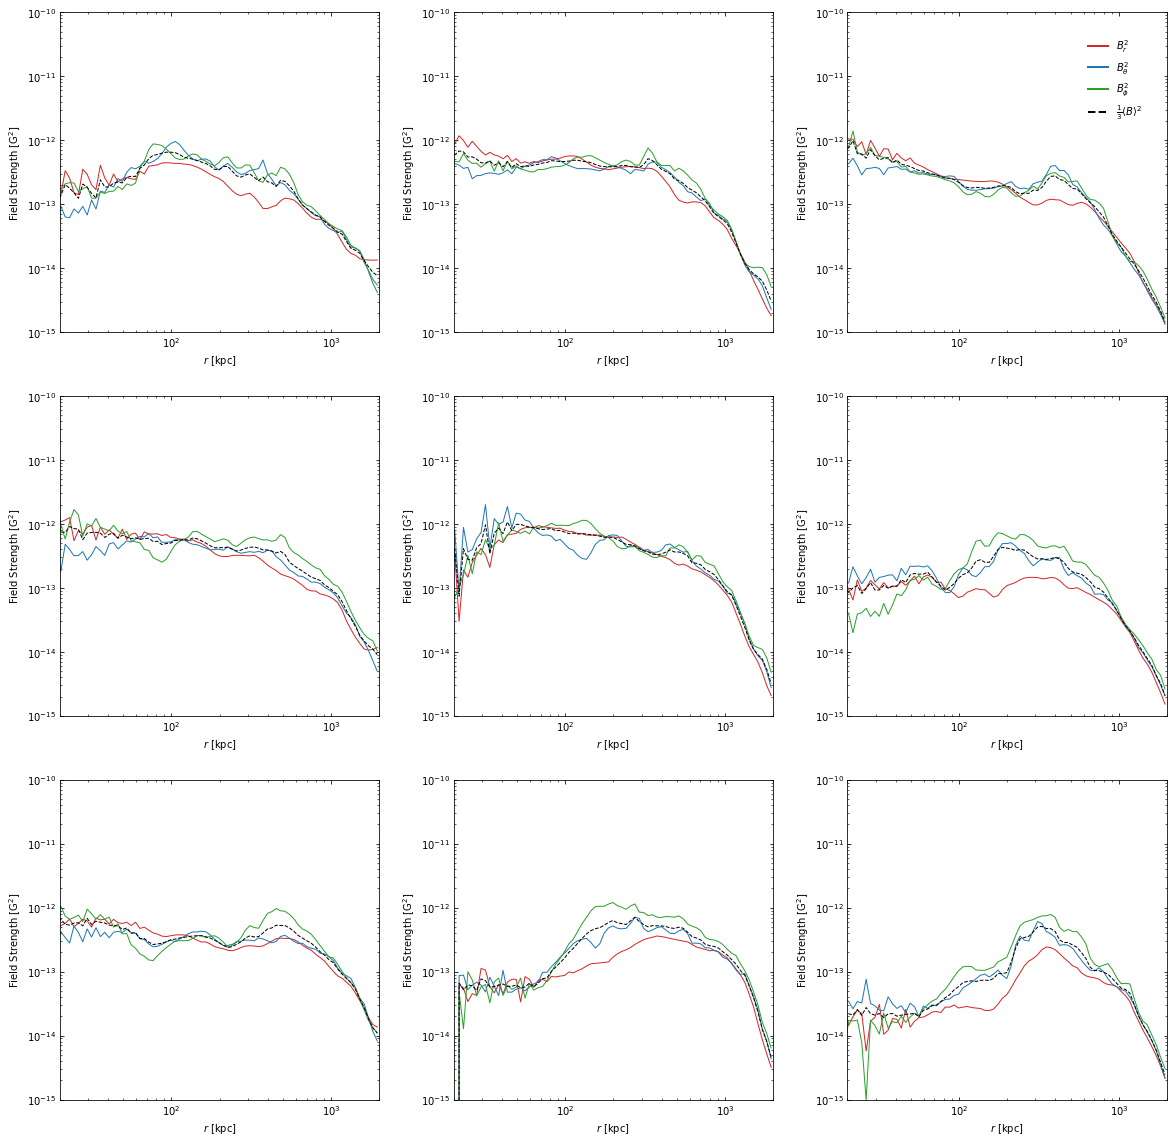

In [8]:
radius = yt.YTArray.from_hdf5(SIM_TYPE11_mag, dataset_name="/%s/radius"%"profiles_0500_most_bound")[a:].in_units('kpc')

plt.close('all')
f = plt.figure()
plt.figure(figsize=(20, 20))

xlim1=2e1
xlim2=2e3
ylim1=1e-15
ylim2=1e-10
num=(np.log10(xlim2)-np.log10(xlim1))/(np.log10(ylim2)-np.log10(ylim1))

ax11 = plt.subplot(331, aspect=num)
ax21 = plt.subplot(332, aspect=num)
ax31 = plt.subplot(333, aspect=num)
ax12 = plt.subplot(334, aspect=num)
ax22 = plt.subplot(335, aspect=num)
ax32 = plt.subplot(336, aspect=num)
ax13 = plt.subplot(337, aspect=num)
ax23 = plt.subplot(338, aspect=num)
ax33 = plt.subplot(339, aspect=num)
# ax11 = plt.subplot(331)
# ax21 = plt.subplot(332)
# ax31 = plt.subplot(333)
# ax12 = plt.subplot(334)
# ax22 = plt.subplot(335)
# ax32 = plt.subplot(336)
# ax13 = plt.subplot(337)
# ax23 = plt.subplot(338)
# ax33 = plt.subplot(339)

axes = [ax11, ax21, ax31, ax12, ax22, ax32, ax13, ax23, ax33]

line_11_r,   = ax11.plot(radius, mag_field_squared_mean_radius(SIM_TYPE11_mag,"profiles_0500_most_bound"), 'C3', lw=1, label=r"$B_{r}^2$")
line_11_t,   = ax11.plot(radius, mag_field_squared_mean_theta(SIM_TYPE11_mag,"profiles_0500_most_bound"), 'C0', lw=1, label=r"$B_{\theta}^2$")
line_11_p,   = ax11.plot(radius, mag_field_squared_mean_phi(SIM_TYPE11_mag,"profiles_0500_most_bound"), 'C2', lw=1, label=r"$B_{\phi}^2$")
line_11_tot, = ax11.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE11_mag,"profiles_0500_most_bound"), 'k--', lw=1, label=r"$\frac{1}{3}{\langle B \rangle}^2$")

line_12_r,   = ax12.plot(radius, mag_field_squared_mean_radius(SIM_TYPE12_mag,"profiles_0500_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_12_t,   = ax12.plot(radius, mag_field_squared_mean_theta(SIM_TYPE12_mag,"profiles_0500_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_12_p,   = ax12.plot(radius, mag_field_squared_mean_phi(SIM_TYPE12_mag,"profiles_0500_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_12_tot, = ax12.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE12_mag,"profiles_0500_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_13_r,   = ax13.plot(radius, mag_field_squared_mean_radius(SIM_TYPE13_mag,"profiles_0500_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_13_t,   = ax13.plot(radius, mag_field_squared_mean_theta(SIM_TYPE13_mag,"profiles_0500_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_13_p,   = ax13.plot(radius, mag_field_squared_mean_phi(SIM_TYPE13_mag,"profiles_0500_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_13_tot, = ax13.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE13_mag,"profiles_0500_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_21_r,   = ax21.plot(radius, mag_field_squared_mean_radius(SIM_TYPE21_mag,"profiles_0500_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_21_t,   = ax21.plot(radius, mag_field_squared_mean_theta(SIM_TYPE21_mag,"profiles_0500_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_21_p,   = ax21.plot(radius, mag_field_squared_mean_phi(SIM_TYPE21_mag,"profiles_0500_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_21_tot, = ax21.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE21_mag,"profiles_0500_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_22_r,   = ax22.plot(radius, mag_field_squared_mean_radius(SIM_TYPE22_mag,"profiles_0500_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_22_t,   = ax22.plot(radius, mag_field_squared_mean_theta(SIM_TYPE22_mag,"profiles_0500_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_22_p,   = ax22.plot(radius, mag_field_squared_mean_phi(SIM_TYPE22_mag,"profiles_0500_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_22_tot, = ax22.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE22_mag,"profiles_0500_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_23_r,   = ax23.plot(radius, mag_field_squared_mean_radius(SIM_TYPE23_mag,"profiles_0450_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_23_t,   = ax23.plot(radius, mag_field_squared_mean_theta(SIM_TYPE23_mag,"profiles_0450_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_23_p,   = ax23.plot(radius, mag_field_squared_mean_phi(SIM_TYPE23_mag,"profiles_0450_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_23_tot, = ax23.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE23_mag,"profiles_0450_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_31_r,   = ax31.plot(radius, mag_field_squared_mean_radius(SIM_TYPE31_mag,"profiles_0500_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_31_t,   = ax31.plot(radius, mag_field_squared_mean_theta(SIM_TYPE31_mag,"profiles_0500_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_31_p,   = ax31.plot(radius, mag_field_squared_mean_phi(SIM_TYPE31_mag,"profiles_0500_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_31_tot, = ax31.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE31_mag,"profiles_0500_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_32_r,   = ax32.plot(radius, mag_field_squared_mean_radius(SIM_TYPE32_mag,"profiles_0500_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_32_t,   = ax32.plot(radius, mag_field_squared_mean_theta(SIM_TYPE32_mag,"profiles_0500_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_32_p,   = ax32.plot(radius, mag_field_squared_mean_phi(SIM_TYPE32_mag,"profiles_0500_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_32_tot, = ax32.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE32_mag,"profiles_0500_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")

line_33_r,   = ax33.plot(radius, mag_field_squared_mean_radius(SIM_TYPE33_mag,"profiles_0500_most_bound"), 'C3', lw=1, label="$B_r^2$")
line_33_t,   = ax33.plot(radius, mag_field_squared_mean_theta(SIM_TYPE33_mag,"profiles_0500_most_bound"), 'C0', lw=1, label="$B_\theta^2$")
line_33_p,   = ax33.plot(radius, mag_field_squared_mean_phi(SIM_TYPE33_mag,"profiles_0500_most_bound"), 'C2', lw=1, label="$B_\phi^2$")
line_33_tot, = ax33.plot(radius, 1/3*mag_field_squared_mean(SIM_TYPE33_mag,"profiles_0500_most_bound"), 'k--', lw=1, label=r"$\langle B \rangle^2/3$")


# Format legends
leg1 = ax31.legend(handles=[line_11_r,line_11_t,line_11_p,line_11_tot], bbox_to_anchor=(0.95, 0.95))

leg1.get_frame().set_linewidth(0.0)

for legobj in leg1.legendHandles:
    legobj.set_linewidth(2.0)

#format axes
for plot_ax in axes:
    plot_ax.tick_params(axis='both',
                    which='both',
                    direction='in',
                    bottom='on',
                    top='on',
                    left='on',
                    right='on')

    plot_ax.set_ylabel("Field Strength [G$^2$]")

    plot_ax.set_xscale('log')
    plot_ax.set_yscale('log')
    plot_ax.set_xlim(xlim1,xlim2)
    plot_ax.set_ylim(ylim1,ylim2)
#     plot_ax.set_xscale('log')
#     plot_ax.set_yscale('symlog', linthreshy=1e-15)
#     plot_ax.set_xlim(xlim1,xlim2)
#     plot_ax.set_ylim(0,1e-11)

#     yaxis = plt.gca().yaxis
#     yaxis.set_minor_locator(MinorSymLogLocator(1e-15))

    plot_ax.set_xlabel("$r$ [kpc]")

    #plot_ax.set_xlim(0.0, 10500.0)
#ax1.set_ylabel("testLABEL")
#ax1.set_title('Time Series (%s)')
#plt.tight_layout()
plt.savefig('mag_field_components_final_most_bound.pdf',bbox_inches='tight')
plt.show()